# Foundations of Computational Economics #43

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Solving DP problems with policy iterations

<img src="_static/img/lab.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/m9R_io8mQoI](https://youtu.be/m9R_io8mQoI)

Description: Policy iterations solution method for infinite horizon dynamic models. Solving stochastic inventory management problem with policy iterations.

### Policy iterations

Also known as **Howard policy improvement** algorithm

Area of application: dynamic decision problems with

- infinite horizon, discrete time  
- particularly well suited for problems with finite state space (discrete states)  

#### Main idea of policy iterations

Break the search of the fixed point (of Bellman or Coleman-Reffett operators) into two steps:

1. Policy evaluation: compute value function for fixed policy function  
1. Policy improvement : find best policy for given value function  


Iterative (back and forth) approach instead of jointly finding the value and policy functions in the fixed point problem.

#### General form of Bellman equation

$$
V(\text{state}) = \max_{\text{decisions}} \big[ U(\text{state},\text{decision}) + \beta \mathbb{E}\big\{ V(\text{next state})  \big| \text{state},\text{decision} \big\} \big]
$$

- $ V(\text{state}) $ is **value function** = maximum attainable (discounted) expected reward/utility/payoff  
- $ U(\text{state},\text{decision}) $ is per-period/flow/instantaneous reward/utility/payoff  
- (*next state*) is the *stochastic* next period state resulting from current state and decision  
- expectation $ \mathbb{E}\{\cdot\} $ is taken over the distribution of the next period state conditional on current state and decision  
- $ \beta $ is a discount factor to measure future rewards in terms of current ones  


The optimal choices are revealed along the solution of the Bellman equation as decisions which solve the maximization problem in the right hand side!

#### Policy iterations step 1

For fixed policy function (decisions) solve for function $ V(\text{state}) $:

$$
V(\text{state}) = U(\text{state},\text{decision}) + \beta \mathbb{E}\big\{ V(\text{next state})  \big| \text{state},\text{decision} \big\}
$$

- functional equation, although simpler than Bellman equation  
- becomes non-linear system of equations with discrete or discretized states  
- becomes *linear* system of equations in many applications where $ \mathbb{E}\{\cdot\} $ can be expressed as matrix multiplication
  - Markov discrete choice problems (all randomness in transition probabilities, no interpolation)
  - when quadrature integration and linear interpolation are used in discretized state spaces  

#### Policy iterations step 2

For fixed value function $ V_0(\text{state}) $ find the optimal policy while computing:

$$
V(\text{state}) = \max_{\text{decisions}} \big[ U(\text{state},\text{decision}) + \beta \mathbb{E}\big\{ V_0(\text{next state})  \big| \text{state},\text{decision} \big\} \big]
$$

- standard evaluation of the Bellman operator  
- any previously considered approaches for implementation of the Bellman operator are applicable  

#### Why policy iterations are useful?

*Rate of convergence!*

- known to be considerably faster than VFI and time iterations  
- yet, step 1 subproblem is comparable in complexity to VFI  
- so, efficient implementation is necessary to justify the use  
- *exact theoretical properties on complexity of the algorithm are unknown for the general case*  

#### Which problems can be solved efficiently by policy iterations?

- want to simplify the policy evaluation step as much as possible!  (otherwise, functional equation of the same complexity as solved by VFI)  
- best is to present the Bellman equation as a linear system (vectorization, linear algebra solver)  
- discrete choice, discrete finite state space problems are best  
- with other problems, it’s not completely straightforward, but not impossible  


Question: can linear interpolation of the value function on a fixed grid be represented as matrix multiplication?  Gaussian quadrature?
3-dim array algebra as in stochastic consumption-savings problem with discretized choices?

#### General policy iterations algorithm

1. Initialize policy or value function (in the latter case reverse the order of the next two steps)  
1. Compute the value of the current policy by solving the Bellman equation without max operation (assuming that current policy is optimal)  
1. Re-compute the policy function by applying the Bellman operator to the found value function  
1. Repeat until convergence in policy or value function space  

### Inventory dynamics model

Recall the inventory management problem (video 37 and exercise 11)

- discrete state, discrete choice, infinite horizon in discrete time  
- choice: $ q\ge 0 $ is the order of new inventory  
- state: $ x\ge 0 $ is inventory in the current time period  
- state: $ d\ge 0 $ is stochastic demand in the current time period  
- payoff in each period is given by  


$$
\begin{eqnarray}
\pi & = & p \cdot \text{sales} - r \cdot \text{storage} - c [\text{if order is made}] \\
& = & p \min\{x,d\} - r (x - \min\{x,d\} + q) - c \mathbb{1}\{q>0\} \\
& = & p \min\{x,d\} - r (\max\{x-d,0\} + q) - c \mathbb{1}\{q>0\}
\end{eqnarray}
$$

#### Inventory dynamics model

- transition rule is given by  


$$
\begin{eqnarray}
x' &=& \max\{x-d,0\} + q \\
d' &-& \text{idiosyncratic}
\end{eqnarray}
$$

Parameters in the model:

- $ p $ is the profit per one unit of (supplied) good  
- $ c $ is the fixed cost of ordering any amount of new inventory  
- $ r $ is the cost of storing one unit of good  
- $ d $ follows truncated geometric distribution with the support $ i \in \{0,1,\dots,N\} $ and corresponding probabilities $ pr_i = (1-\lambda)^i \lambda $ (with last probability corrected for truncation)  

#### Bellman equation

$$
\begin{eqnarray}
V(x,d) &=& \max_{q \ge 0} \Big\{ \pi + \beta \mathbb{E}\Big[ V\big(x', d' \big) \Big| x,d,q \Big] \Big\} \\
&=& \max_{q \ge 0} \Big\{ sp - x' r - c \mathbb{1}\{q>0\}
+ \beta \mathbb{E}\Big[ V\big( x', d' \big) \Big] \Big\}
\end{eqnarray}
$$

$$
\begin{eqnarray}
s &=& \min\{x,d\} \\
x' &=& \max\{x-d,0\} + q
\end{eqnarray}
$$

- the expectation is taken over the distribution of the next period demand $ d' $  

#### Bellman equation in expected value function space

- random demand is *idiosyncratic* = distribution does not depend on the previous period variables  
- can reduce the dimensionality of the fixed point problem by rewriting the Bellman operator in expected value function terms  


$$
EV(x') =  \mathbb{E}\Big[ V\big(x', d' \big) \Big| x,d,q \Big] =  \mathbb{E}\Big[ V\big(x', d' \big) \Big]
$$

$$
V(x,d) = \max_{q \ge 0} \Big\{ sp - x' r - c \mathbb{1}\{q>0\}
+ \beta EV(x') \Big\}
$$

#### Bellman equation in expected value function space

Taking the expectation with respect to $ d $ on both sides, we get

$$
EV(x) = \mathbb{E}\Big[ \max_{q \ge 0} \Big\{ sp - x' r - c \mathbb{1}\{q>0\}
+ \beta EV(x') \Big\} \Big]
$$

$$
EV(x) = \sum_{d} \Big[ \max_{q \ge 0} \Big\{ sp - x' r - c \mathbb{1}\{q>0\}
+ \beta EV(x') \Big\} \Big] pr(d)
$$

- demand is a discrete random variable with probabilities $ pr(d) $ for different values $ d $  
- functional equation in $ EV(\cdot) $ which is also a contraction mapping!  

#### Policy function

- fixed point of the Bellman operator $ EV(x) $ in *expected value function* space defines the solution of the model  
- but the policy is still given by the function of two variables  


$$
q^\star(x,d) = \arg\max_{q \ge 0} \Big\{ sp - x' r - c \mathbb{1}\{q>0\}
+ \beta EV(x') \Big] \Big\}
$$

$$
\begin{eqnarray}
s &=& \min\{x,d\} \\
x' &=& \max\{x-d,0\} + q
\end{eqnarray}
$$

#### Further refinements

Sequence of events in each time period (timing assumptions in the model):

- start period with inventory $ x $  
- demand $ d $ is realized  
- decision $ q^\star(x,d) $  
- current profit is computed as function of $ x,d,q $  
- the next period inventory $ x' =  \max\{x-d,0\} + q $ is stored for the rest of the period  


Note that ordering decision is made based on the stock *remaining after trading is over* $ \max\{x-d,0\} $ rather than on $ x $ and $ d $ independently!

#### Post trade stock (remaining stock)

- let $ y = \max\{x-d,0\} = x - \min\{x,d\} $ denote the remaining inventory after the trading phase  
- now the optimal policy can be written as  


$$
\begin{eqnarray}
q^\star(x,d) &=& \arg\max_{q \ge 0} \Big\{ sp - x'r - c \mathbb{1}\{q>0\}
+ \beta EV(x') \Big\}\\
q^\star(x,d) &=& \arg\max_{q \ge 0} \Big\{ p \min\{x,d\} - (y + q)r  - c \mathbb{1}\{q>0\}
+ \beta EV(y+q) \Big\}\\
q^\star(x,d) &=& \arg\max_{q \ge 0} \Big\{ - q r - c \mathbb{1}\{q>0\}
+ \beta EV(y+q) \Big\} = q^\star(y)
\end{eqnarray}
$$

- thus, policy function is function of *one* variable $ q^\star(y) $ which is convenient  

#### Resulting compact solution for the inventory model

- Bellman equation in expected value function space  


$$
EV(x) = \sum_{d} \Big[ p \min\{x,d\} - yr + \max_{q \ge 0} \Big\{ -qr -c \mathbb{1}\{q>0\}
+ \beta EV(y+q) \Big\} \Big] pr(d)
$$

- Definition of the policy function, assuming $ EV(x) $ satisfies the equation above  


$$
q^\star(y) = \arg\max_{q \ge 0} \Big\{ -qr - c \mathbb{1}\{q>0\} + \beta EV(y+q) \Big\}
$$

$$
y = \max\{x-d,0\}
$$

#### Preparing for policy iterations

- Policy $ q(y) $ evaluation (in terms of expected value function) is $ EV(x) $ that solves  


$$
EV(x) = \sum_{d} \Big[ p \min\{x,d\} - (y+q(y))r -c \mathbb{1}\{q(y)>0\}
+ \beta EV(y+q(y)) \Big] pr(d)
$$

- Improved policy $ q'(y) $ given expected value $ EV(x) $ is  


$$
q'(y) = \arg\max_{q \ge 0} \Big\{ -qr - c \mathbb{1}\{q>0\} + \beta EV(y+q) \Big\}
$$

Policy iterations solver is applicable!

#### Examine the problem in step 1 (policy evaluation)

$$
EV(x) = \sum_{d} \Big[ p \min\{x,d\} - (y+q(y))r -c \mathbb{1}\{q(y)>0\}
+ \beta EV(y+q(y)) \Big] pr(d)
$$

- state space $ S = \{0,1,\dots,N\} $, $ x,d,y,q \in S $ (all function are defined on finite $ S $)  
- $ EV(x) $ is given by a vector $ EV $ with $ N+1 $ elements corresponding to points in $ S $  
- $ EV(y+q) $ is a particular indexing of the elements of $ EV $, can be expressed as matrix multiplication  
- otherwise RHS is linear function of the re-indexed vector $ EV $  

In [1]:
# example of re-indexing as matrix multiplication
import numpy as np
ev = np.array([11,21,32,43,54,65,76])  # vector EV
j = [1,0,2,2,4,3,5]                    # represent y+q(y)
n = ev.size
M = np.zeros((n,n),dtype=int)  # start with all zeros
M[range(n),j] = 1              # mark
ev1 = M@ev
print('EV=',ev,'y+q(y)=',j,'re-indexing matrix =',M,'EV(y+q(y))',ev1,sep='\n')

EV=
[11 21 32 43 54 65 76]
y+q(y)=
[1, 0, 2, 2, 4, 3, 5]
re-indexing matrix =
[[0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]]
EV(y+q(y))
[21 11 32 32 54 43 65]


#### Plan for the implementation

- let $ EV $ be the vector of values of $ EV(x) $ for all $ x $  
- let $ M(d) $ denote the matrix such that $ M(d) \cdot EV = EV(y+q(y)) $  
- let $ C(d) = p \min\{x,d\} - (y+q(y))r -c \mathbb{1}\{q(y)>0\} $ denote the constant term  


$$
\begin{eqnarray}
EV &=& \sum_{d} \Big[ C(d) + \beta M(d) \cdot EV \Big] pr(d) \\
&=& \sum_{d} pr(d) C(d)  + \beta \sum_{d} pr(d) M(d) \cdot EV  = \bar{C} + \beta \bar{M} \cdot EV
\end{eqnarray}
$$

- where $ \bar{M} = \sum_{d} pr(d) M(d) $ is a square matrix  
- *linear system* $ (I-\beta\bar{M}) \cdot EV = \bar{C} $!  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# COPY of the code from exercise 11, only infinite horizon version, combined into single class
class inventory_model:
    '''Small class to hold model fundamentals and its solution'''

    def __init__(self,label='noname',
                 max_inventory=10,  # upper bound on the state space
                 c = 3.2,            # fixed cost of order
                 p = 2.5,           # profit per unit of good
                 r = 0.5,           # storage cost per unit of good
                 β = 0.95,          # discount factor
                 dp = 0.5,          # parameter in geometric distribution of demand
                 demand = 4         # fixed demand
                 ):
        '''Create model with default parameters'''
        self.label=label # label for the model instance
        self.c, self.p, self.r, self.β, self.dp= c, p, r, β, dp
        self.demand = demand
        # created dependent attributes (it would be better to have them updated when underlying parameters change)
        self.n = max_inventory+1    # number of inventory levels
        self.upper = int(max_inventory)  # upper boundary on inventory
        self.x = np.arange(self.n,dtype=int)  # all possible values of inventory and demand (state space)

    def __repr__(self):
        '''String representation of the model'''
        return 'Inventory model labeled "{}"\nParamters (c,p,r,β) = ({},{},{},{})\nDemand={}\nUpper bound on inventory {}' \
               .format (self.label,self.c,self.p,self.r,self.β,self.demand,self.upper)

    def sales(self,x,d):
        '''Sales in given period'''
        return np.minimum(x,d)

    def next_x(self,x,d,q):
        '''Inventory to be stored, becomes next period state'''
        return x - self.sales(x,d) + q

    def profit(self,x,d,q):
        '''Profit in given period'''
        return self.p * self.sales(x,d) - self.r * self.next_x(x,d,q) - self.c * (q>0)

    def demand_pr(self,plot=False):
        '''Computes stochastic demand probs'''
        k = np.arange(self.n)  # all possible values of demand
        pr = (1-self.dp)**k *self.dp
        pr[-1] = 1 - pr[:-1].sum()  # update last prob to ensure sum=1
        if plot:
            plt.step(self.x,pr,where='mid')
            plt.title('Distribution of demand')
            plt.show()
        return pr

    def bellman(self,ev0):
        '''Bellman operator for inventory model
           Inputs: model object
                   next period EXPECTED value function
        '''
        pr = self.demand_pr()
        ev1 = np.zeros(shape=self.x.shape)
        for j,d in enumerate(self.x):  # over all values of demand
            # create the grid of choices (same as x), column-vector
            q = self.x[:,np.newaxis]
            # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
            p = self.profit(self.x,d,q)
            # indexes for next period value with extrapolation using last value
            i = np.minimum(self.next_x(self.x,d,q),self.upper)
            # compute the Bellman maximand
            vm = p + self.β*ev0[i]
            # find max and argmax
            v1 = np.amax(vm,axis=0)  # maximum in every column
            ev1 = ev1 + pr[j]*v1
        q1 = self.optimal_policy(ev1)
        return ev1, q1

    def optimal_policy(self,ev):
        '''Computes the optimal policy function as function of post trade stock for the stochastic
        inventory dynamics model for given EV function'''
        # idea: 2-dim array with q in axes 0, y = max(x-d,0) in axis 1
        q = self.x[:,np.newaxis]  # choices
        y = self.x[np.newaxis,:]  # post trading stock
        # indexes for next period value with extrapolation using last value
        i = np.minimum(y+q,self.upper)
        # compute the Bellman maximand
        vm = -self.r*q -self.c*(q>0) + self.β*ev[i]
        # find argmax and argmax
        return np.argmax(vm,axis=0)  # maximum in every column

    def solve_vfi(self,tol=1e-6,maxiter=500,callback=None):
        '''Solves the model using value function iterations
        '''
        ev0 = np.zeros(self.n) # initial point for VFI
        for i in range(maxiter):  # main loop
            ev1, q1 = self.bellman(ev0)  # update approximation
            err = np.amax(np.abs(ev0-ev1))
            if callback != None: callback(iter=i,err=err,ev1=ev1,ev0=ev0,q1=q1,model=self)
            if err<tol:
                break  # break out if converged
            ev0 = ev1  # get ready to the next iteration
        else:
            raise RuntimeError('Failed to converge in %d iterations'%maxiter)
        return ev1, q1

    def policy_evaluation(self,q):
        '''The expected value of the given policy
           Returns a vector ev for all points in the state space
        '''
        pr = self.demand_pr()
        Cbar = np.zeros(self.n)
        Mbar = np.zeros((self.n,self.n))
        for j,d in enumerate(self.x):          # over all values of demand
            y = self.x - self.sales(self.x,d)  # post trade stock for all values of x | d
            p = self.profit(self.x,d,q[y])     # profits for all values of x | d, q()
            Cbar += pr[j]*p
            i = np.minimum(y+q[y],self.upper)  # next period stock for all x | d, q()
            M = np.zeros((self.n,self.n),dtype=int)  # start with all zeros
            M[range(self.n),i] = 1             # transformation matrix
            Mbar += pr[j]*M
        A = np.eye(self.n) - self.β*Mbar
        ev = np.linalg.solve(A,Cbar)
        return ev

    def solve_policyiter(self,tol=1e-6,maxiter=500,callback=None):
        '''Solves the model using policy iterations
        '''
        q0 = np.zeros(self.n,dtype=int) # initial point for policy iterations
        for i in range(maxiter):  # main loop
            # step 1: policy evaluation
            ev = self.policy_evaluation(q0)
            # step 2: policy improvement
            q1 = self.optimal_policy(ev)
            err = np.amax(np.abs(q0-q1))
            if callback != None: callback(iter=i,err=err,ev1=ev,q1=q1,model=self)
            if err<tol:
                break  # break out if converged
            q0 = q1  # get ready to the next iteration
        else:
            raise RuntimeError('Failed to converge in %d iterations'%maxiter)
        ev1 = self.policy_evaluation(q1)
        return ev1,q1

    def solve_show(self,method='vfi',maxiter=1000,tol=1e-6,**kvargs):
        '''Illustrate solution'''
        fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
        ax1.grid(b=True, which='both', color='0.65', linestyle='-')
        ax2.grid(b=True, which='both', color='0.65', linestyle='-')
        ax1.set_xlabel('Inventory')
        ax2.set_xlabel('Post trade inventory')
        ax1.set_title('Value function')
        ax2.set_title('Optimal new orders')
        def callback(**argvars):
            mod, ev, q = argvars['model'],argvars['ev1'],argvars['q1']
            ax1.step(mod.x,ev,color='k',alpha=0.25,where='mid')
            ax2.step(mod.x,q,color='k',alpha=0.25,where='mid')
            print(argvars['iter'],end=' ')
        if method=='vfi':
            ev,pk = self.solve_vfi(maxiter=maxiter,tol=tol,callback=callback,**kvargs)
        elif method=='policyiter':
            ev,pk = self.solve_policyiter(maxiter=maxiter,tol=tol,callback=callback,**kvargs)
        else:
            raise RuntimeError('Unknown method in solve_show()')
        # add solutions
        ax1.step(self.x,ev,color='r',linewidth=2.5,where='mid')
        ax2.step(self.x,pk,color='r',linewidth=2.5,where='mid')
        plt.show()
        return ev,pk

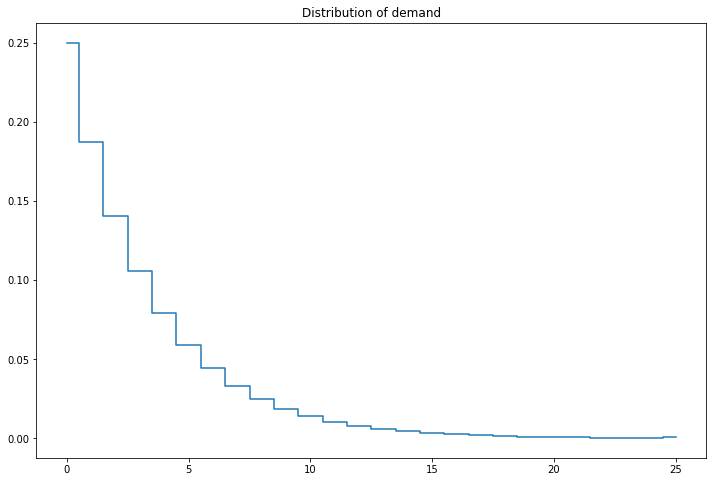

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 

56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 

114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 

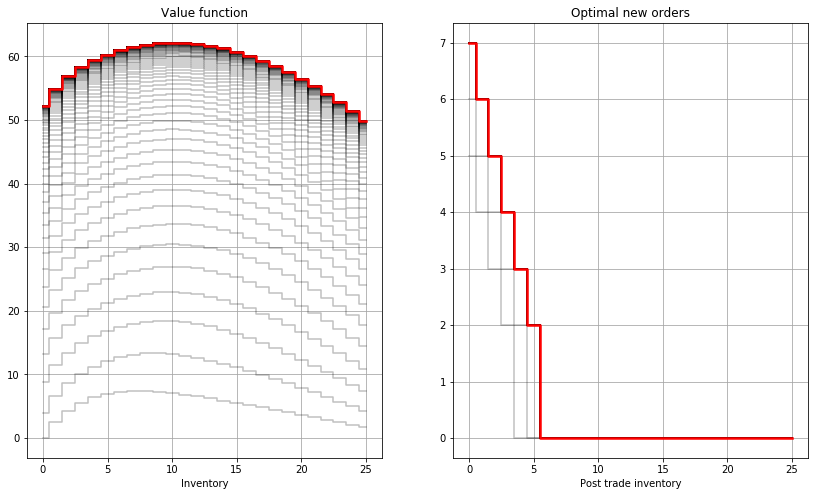

0 1 2 3 

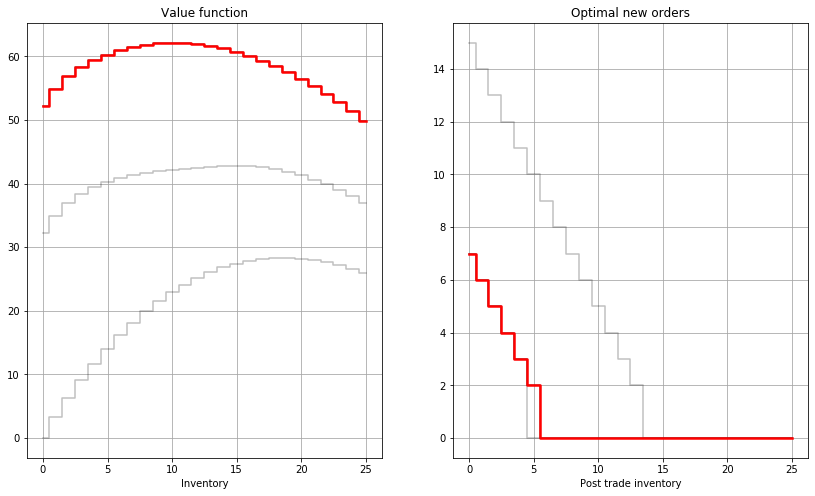

Diff in value functions = -8.159e-06
Diff in policy functions = 0.00000


In [3]:
mod = inventory_model(max_inventory=25)
mod.dp=.25
mod.c = .25
mod.p = 3.5
mod.r = 0.4
mod.β = 0.9
mod.demand_pr(plot=True)
ev1,q1 = mod.solve_vfi()
mod.solve_show()
ev2,q2 = mod.solve_policyiter()
mod.solve_show(method='policyiter');
print('Diff in value functions = %1.3e\nDiff in policy functions = %1.5f'%(np.amax(ev1-ev2),np.amax(q1-q2)))

In [4]:
def optimal_policy(self,ev):
    '''Computes the optimal policy function as function of post trade stock for the stochastic
    inventory dynamics model for given EV function'''
    # idea: 2-dim array with q in axes 0, y = max(x-d,0) in axis 1
    q = self.x[:,np.newaxis]  # choices
    y = self.x[np.newaxis,:]  # post trading stock
    # indexes for next period value with extrapolation using last value
    i = np.minimum(y+q,self.upper)
    # compute the Bellman maximand
    vm = -self.r*q -self.c*(q>0) + self.β*ev[i]
    # find argmax and argmax
    return np.argmax(vm,axis=0)  # maximum in every column

ev,_ = mod.solve_vfi()
q = optimal_policy(mod,ev)
print('Optimal orders of new inventory for y = max(x-d,0):')
print(q)

Optimal orders of new inventory for y = max(x-d,0):
[7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
# COPY from exercise 11
def optimal_policy_old(m,ev):
    '''Computes the optimal policy function for the stochastic
    inventory dynamics model for given EV function'''
    # idea: 3-dim array with q in axes 0, d in axis 1 and x in axis 2
    q = m.x[:,np.newaxis,np.newaxis]  # choices
    d = m.x[np.newaxis,:,np.newaxis]  # demand
    x = m.x[np.newaxis,np.newaxis,:]  # inventories
    # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
    p = m.profit(x,d,q)  # 3-dim array
    # indexes for next period value with extrapolation using last value
    i = np.minimum(m.next_x(x,d,q),m.upper)
    # compute the Bellman maximand
    vm = p + m.β*ev[i]
    # find argmax and argmax
    return np.argmax(vm,axis=0)  # maximum in every column

q = optimal_policy_old(mod,ev)
print('Optimal orders of new inventory for d,x:\n(d in rows, x in columns)')
print(q)
# Note the symmetry in the optimal policy!
# This implies that knowing both x and d is not necessary for the
# optional new order, it's enough to condition on the inventory
# remaining after sales, i.e. x-min(x,d) = max(0,x-d)

Optimal orders of new inventory for d,x:
(d in rows, x in columns)
[[7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0

#### Convergence rate comparison between policy iterations and VFI

- generally, policy iterations converge much faster  
- more work is needed for each iteration (policy evaluation step!)  
- if first step done efficiently, significant advantage over VFI  

#### Modified policy iteration algorithm

In problems where the first step (policy evaluation) is hard to perform efficiently, it can be
replaced by a finite forward simulation of Bellman operator under current policy to yield an approximate
value.

### Further learning resources

- Discrete state dynamic programming and policy iterations at QuantEcon
  [https://python-advanced.quantecon.org/discrete_dp.html](https://python-advanced.quantecon.org/discrete_dp.html)  
- On theoretical properties of Howard’s algorithm
  [https://link.springer.com/chapter/10.1007/978-3-642-17517-6_37#:~:text=Howard’s%20policy%20iteration%20algorithm%20is,Markov%20Decision%20Processes%20(MDPs).&text=The%20theoretical%20complexity%20of%20Howard’s,known%20on%20its%20running%20time](https://link.springer.com/chapter/10.1007/978-3-642-17517-6_37#:~:text=Howard's%20policy%20iteration%20algorithm%20is,Markov%20Decision%20Processes%20%28MDPs%29.&text=The%20theoretical%20complexity%20of%20Howard's,known%20on%20its%20running%20time).  